In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
scaling = pd.read_csv('scaling.txt', sep=' ')
scaling

,nr_points,bucket_size,i_time,radius,nr_results,q_time,n_nr_results,n_q_time
0,50000,10,0.015623,0.05,102,0.000008,102,0.000374
1,50000,10,0.015623,0.10,468,0.000029,468,0.000385
2,50000,10,0.015623,0.15,1149,0.000067,1149,0.000411
3,50000,10,0.015623,0.20,2006,0.000124,2006,0.000437
4,50000,10,0.015623,0.25,3163,0.000205,3163,0.000472
5,50000,10,0.015623,0.30,4518,0.000277,4518,0.000510
6,50000,10,0.015623,0.35,6129,0.000370,6129,0.000558
7,50000,10,0.015623,0.40,7940,0.000472,7940,0.000609
8,50000,10,0.015623,0.45,10160,0.000595,10160,0.000671
9,50000,10,0.015623,0.50,12519,0.000753,12519,0.000741


In [5]:
def plot_query_size_eff(scaling, point_nrs):
    plt.figure(figsize=(14, 10))
    plt.xscale('log')
    plt.xlabel('fraction of points returned by query')
    plt.yscale('log')
    plt.ylabel('ratio of naive versus tree_2k query time')
    data = []
    legend_keys = []
    for nr_points in point_nrs:
        sel = scaling.nr_points == nr_points
        data.extend([scaling[sel]['nr_results']/scaling[sel]['nr_points'],
                     scaling[sel]['n_q_time']/scaling[sel]['q_time'], '-'])
        legend_keys.append('nr. points = {0:d}'.format(nr_points))
    plt.plot(*data);
    plt.legend(legend_keys)

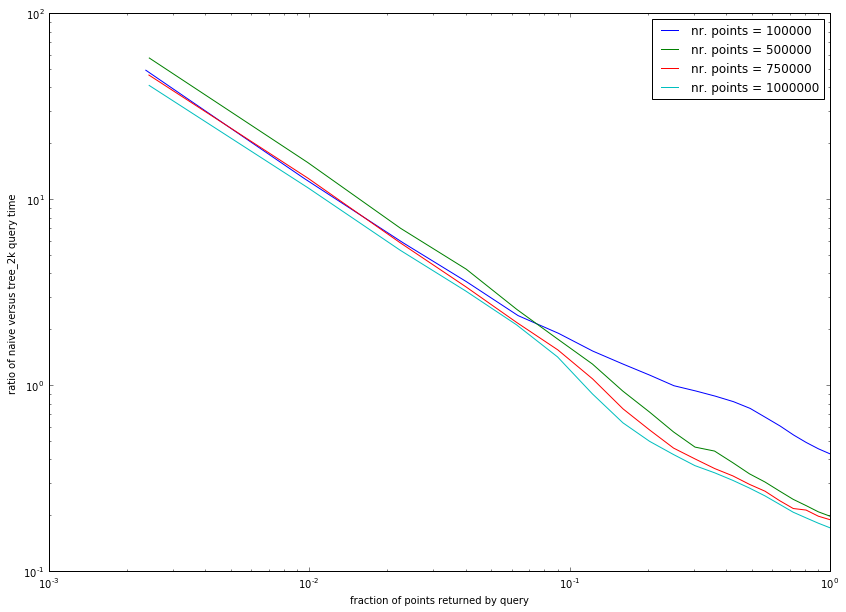

In [6]:
plot_query_size_eff(scaling, [100000, 500000, 750000, 1000000])

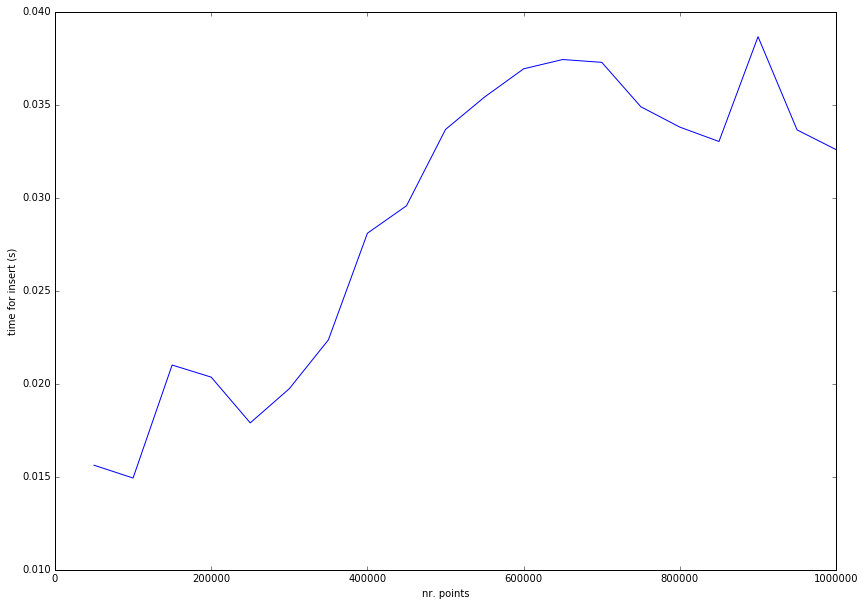

In [7]:
plt.figure(figsize=(14, 10))
plt.xlabel('nr. points')
plt.ylabel('time for insert (s)')
plt.plot(scaling['nr_points'], scaling['i_time']);

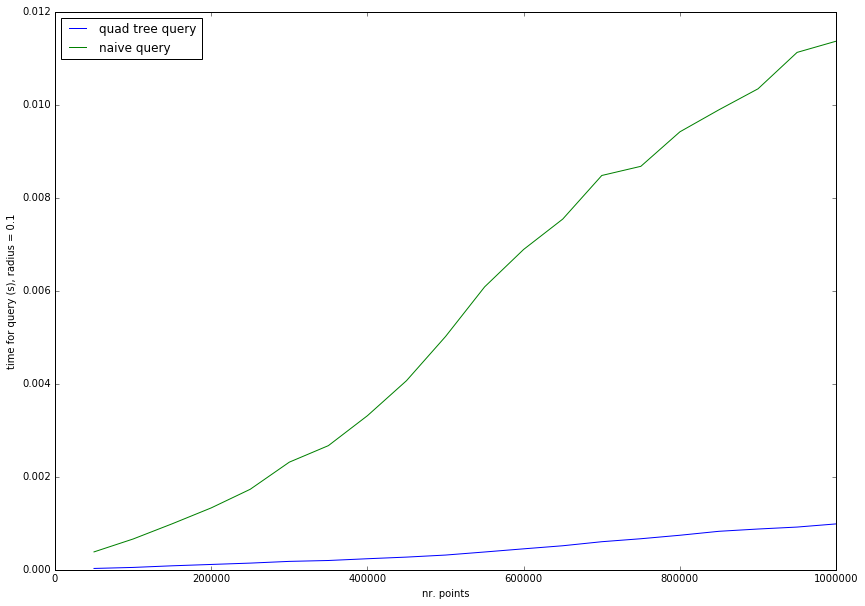

In [8]:
plt.figure(figsize=(14, 10))
plt.xlabel('nr. points')
plt.ylabel('time for query (s), radius = 0.1')
sel = scaling.radius == 0.10
plt.plot(scaling[sel]['nr_points'], scaling[sel]['q_time'],
         scaling[sel]['nr_points'], scaling[sel]['n_q_time'])
plt.legend(['quad tree query', 'naive query'], loc='upper left');

In [9]:
overhead = pd.read_csv('overhead.txt', sep=' ')
overhead

,nr_points,nr_nodes,nr_leafs,avg_points,stddev_oints,coord_size,total_size
0,50000,16283,12158,4.11,2.245,32000000,33267984
1,100000,24688,18479,5.41,2.266,32000000,33924264
2,150000,41507,30981,4.84,2.655,32000000,35231656
3,200000,65417,48830,4.10,2.242,32000000,37093296
4,250000,80100,59877,4.18,2.008,32000000,38239960
5,300000,87109,65182,4.60,2.036,32000000,38788592
6,350000,91970,68859,5.08,2.151,32000000,39169000
7,400000,99194,74254,5.39,2.280,32000000,39731552
8,450000,109874,82198,5.47,2.442,32000000,40561952
9,500000,125359,93696,5.34,2.585,32000000,41765152


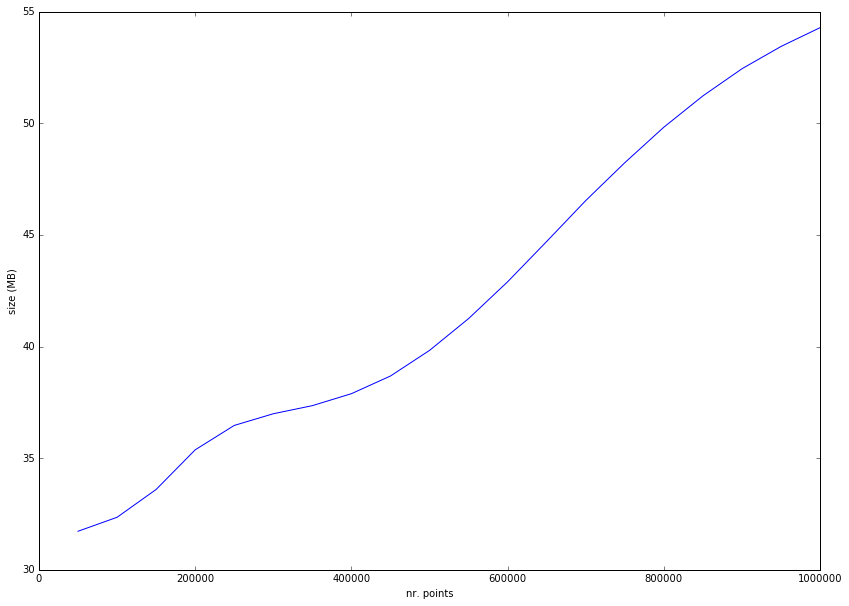

In [10]:
plt.figure(figsize=(14, 10))
plt.xlabel('nr. points')
plt.ylabel('size (MB)')
plt.plot(overhead['nr_points'], overhead['total_size']/1024**2);

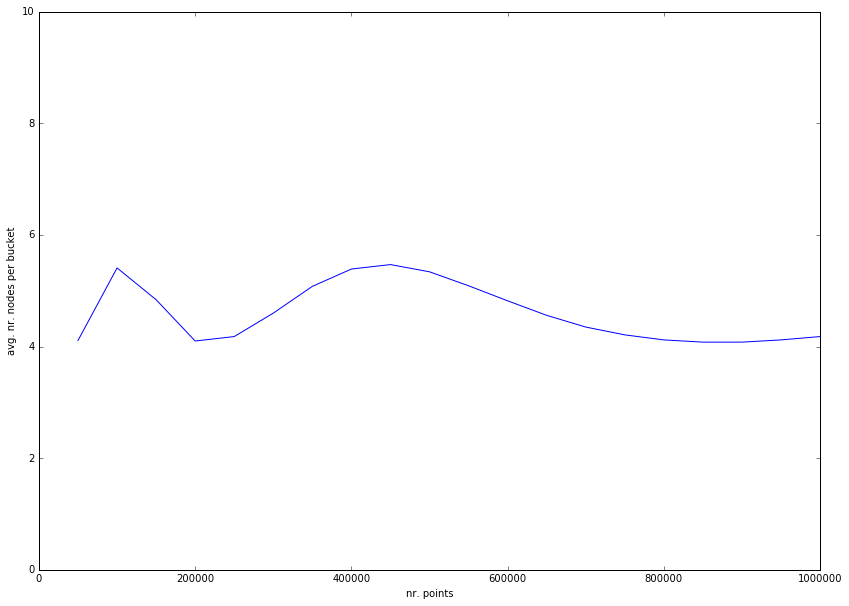

In [11]:
plt.figure(figsize=(14, 10))
plt.xlabel('nr. points')
plt.ylabel('avg. nr. nodes per bucket')
plt.ylim([0.0, 10.0])
plt.plot(overhead['nr_points'], overhead['avg_points']);